In [14]:
import glob
import numpy as np
import shutil
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
path = "/Users/nduginets/PycharmProjects/master-diploma/results-comet-gans"

In [16]:
def get_vals(exec_type):
    items = glob.glob(os.path.join(path, 'gans.train_'+exec_type+'.inceptionv4.split*'))
    items = list(map(lambda x: os.path.join(x, 'val.csv'), items))
    return items

In [17]:
real = get_vals("Real")
pix2pix = get_vals("pix2pix")

In [18]:
def get_aucs(items):
    res = []
    for p in items:
        res.append(pd.read_csv(p).iloc[-1]['auc'])
    return np.array(res).astype(np.float)

In [19]:
real_auc = get_aucs(real)

In [20]:
pix2pix_auc = get_aucs(pix2pix)

## average

In [21]:
real_average = np.average(real_auc)
pix2pix_average = np.average(pix2pix_auc)

print("real average:", real_average)
print("pix2pix average:", pix2pix_average)

real average: 0.9430216853645537
pix2pix average: 0.9417428585376739


## mean

In [22]:
real_mean = np.mean(real_auc)
pix2pix_mean = np.mean(pix2pix_auc)

print("real mean:", real_mean)
print("pix2pix mean:", pix2pix_mean)

real mean: 0.9430216853645537
pix2pix mean: 0.9417428585376739


## 25 percentile

In [23]:
real_25_percentile = np.percentile(real_auc, 25)
pix2pix_25_percentile = np.percentile(pix2pix_auc, 25)

print("real 25 percentile:", real_25_percentile)
print("pix2pix 25 percentile:", pix2pix_25_percentile)

real 25 percentile: 0.9375084996652439
pix2pix 25 percentile: 0.9389812301238598


## 75 percentile

In [24]:
real_75_percentile = np.percentile(real_auc, 75)
pix2pix_75_percentile = np.percentile(pix2pix_auc, 75)

print("real 75 percentile:", real_75_percentile)
print("pix2pix 75 percentile:", pix2pix_75_percentile)

real 75 percentile: 0.9467718271403465
pix2pix 75 percentile: 0.9487208657628253


## plots

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.92863812 0.94188844 0.94749561 0.94234742 0.94611997 0.93737708
 0.94559168 0.95175328 0.94742369 0.93745554 0.95518976 0.94318301
 0.94441611 0.93856965 0.93494749 0.93756146 0.95468502 0.94602713
 0.93674157]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[0.94265341 0.95127469 0.89875722 0.9458519  0.93351823 0.95115177
 0.93631397 0.94789313 0.94974475 0.94300517 0.93804006 0.94905431
 0.94516408 0.93438258 0.94634619 0.94899678 0.94741846 0.94180475]


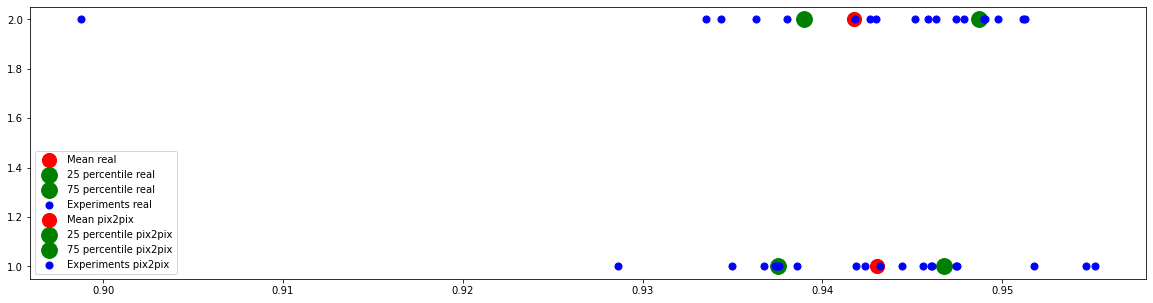

In [25]:
def draw_runs(data, name, offset = 1):
    offsets = np.empty(data.shape)
    offsets.fill(offset)
    print(offsets)
    print(data)
    plt.scatter(np.mean(data), offset, label="Mean %s" % name, color="red", s=200)
    plt.scatter(np.percentile(data, 25), offset, label="25 percentile %s" % name, color="green", s=250)
    plt.scatter(np.percentile(data, 75), offset, label="75 percentile %s" % name, color="green", s=250)
    plt.scatter(data, offsets, label="Experiments %s" % name, color="blue", s=50)
    plt.legend()


plt.figure(figsize=(20, 5))
draw_runs(real_auc, "real")
draw_runs(pix2pix_auc, "pix2pix", 2)
plt.show()